In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [19]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-23--16h-54m-21s',
 '2025-05-23--16h-54m-26s',
 '2025-05-23--16h-54m-30s',
 '2025-05-23--16h-54m-34s',
 '2025-05-23--16h-54m-37s',
 '2025-05-23--16h-54m-41s',
 '2025-05-23--16h-54m-45s',
 '2025-05-23--16h-54m-49s',
 '2025-05-23--16h-54m-53s',
 '2025-05-23--16h-54m-57s',
 '2025-05-23--16h-55m-01s',
 '2025-05-23--16h-55m-05s',
 '2025-05-23--16h-55m-08s',
 '2025-05-23--16h-55m-12s',
 '2025-05-23--16h-55m-16s',
 '2025-05-23--16h-55m-20s',
 '2025-05-23--16h-55m-24s',
 '2025-05-23--16h-55m-28s',
 '2025-05-23--16h-55m-32s',
 '2025-05-23--16h-55m-36s',
 '2025-05-23--16h-55m-40s',
 '2025-05-23--16h-55m-44s',
 '2025-05-23--16h-55m-47s',
 '2025-05-23--16h-55m-51s',
 '2025-05-23--16h-55m-55s',
 '2025-05-23--16h-55m-59s',
 '2025-05-23--16h-56m-03s',
 '2025-05-23--16h-56m-07s',
 '2025-05-23--16h-56m-11s',
 '2025-05-23--16h-56m-15s',
 '2025-05-23--16h-56m-19s',
 '2025-05-23--16h-56m-23s',
 '2025-05-23--16h-56m-27s',
 '2025-05-23--16h-56m-31s',
 '2025-05-23--16h-56m-35s',
 '2025-05-23--16h-56

In [20]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates_n=40.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-23--16h-54m-21s,2.0,38.0,0.0,0.0,40.0,0.317560,1.570796,0.000000,0,100
1,2025-05-23--16h-54m-21s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,0,100
2,2025-05-23--16h-54m-21s,2.0,78.0,0.0,0.0,80.0,0.224075,1.570796,0.000000,0,100
3,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100
4,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100
...,...,...,...,...,...,...,...,...,...,...,...
23359,2025-05-23--19h-08m-07s,6.0,0.0,193.0,1.0,200.0,2.876240,1.183200,3.141593,0,5000
23360,2025-05-23--19h-08m-07s,5.0,0.0,195.0,0.0,200.0,2.917517,1.570796,3.141593,0,5000
23361,2025-05-23--19h-08m-07s,3.0,0.0,196.0,1.0,200.0,2.941258,1.047198,3.141593,0,5000
23362,2025-05-23--19h-08m-07s,5.5,0.0,194.0,0.5,200.0,2.896027,1.277954,3.141593,0,5000


In [21]:
# more than 1000 repetitions
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

In [22]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

/tmp/ipykernel_1139172/3016822920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
/tmp/ipykernel_1139172/3016822920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])


,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
270,2025-05-23--17h-24m-53s,1.0,39.0,0.0,0.0,40.0,0.224075,1.570796,0.000000,0,5000,0.0,0.0
271,2025-05-23--17h-24m-53s,1.0,39.0,0.0,0.0,40.0,0.224075,1.570796,0.000000,0,5000,0.0,0.0
272,2025-05-23--17h-24m-53s,1.5,38.0,0.0,0.5,40.0,0.317560,1.047198,0.000000,0,5000,0.0,0.0
273,2025-05-23--17h-24m-53s,0.5,39.0,0.0,0.5,40.0,0.224075,0.785398,0.000000,0,5000,0.0,0.0
274,2025-05-23--17h-24m-53s,1.0,39.0,0.0,0.0,40.0,0.224075,1.570796,0.000000,0,5000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,2025-05-23--19h-08m-07s,6.0,0.0,193.0,1.0,200.0,2.876240,1.183200,3.141593,0,5000,180.0,0.0
23360,2025-05-23--19h-08m-07s,5.0,0.0,195.0,0.0,200.0,2.917517,1.570796,3.141593,0,5000,180.0,0.0
23361,2025-05-23--19h-08m-07s,3.0,0.0,196.0,1.0,200.0,2.941258,1.047198,3.141593,0,5000,180.0,0.0
23362,2025-05-23--19h-08m-07s,5.5,0.0,194.0,0.5,200.0,2.896027,1.277954,3.141593,0,5000,180.0,0.0


In [23]:
# only where repetitions > 1000
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

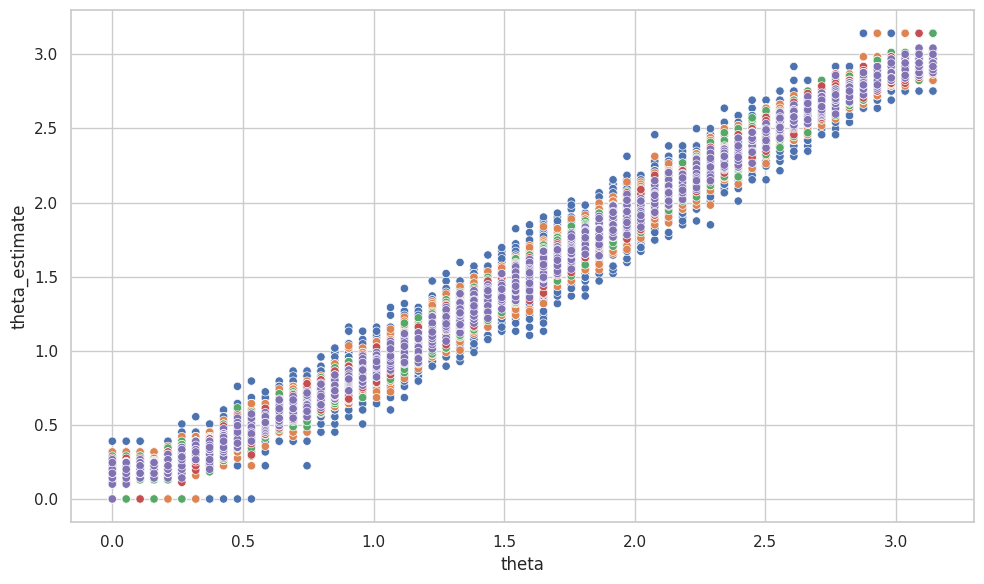

In [33]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

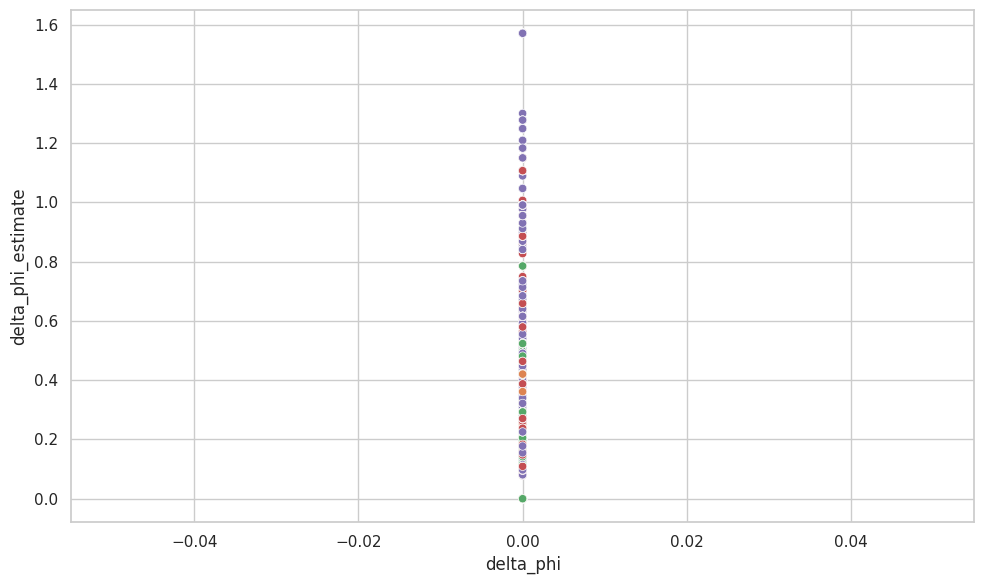

In [34]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [37]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-23--17h-24m-53s   40.0       0.135890  0.119696  0.014327   
1    2025-05-23--17h-24m-53s   80.0       0.152293  0.097135  0.009435   
2    2025-05-23--17h-24m-53s  120.0       0.165457  0.072126  0.005202   
3    2025-05-23--17h-24m-53s  160.0       0.164171  0.075478  0.005697   
4    2025-05-23--17h-24m-53s  200.0       0.169206  0.061541  0.003787   
..                       ...    ...            ...       ...       ...   
295  2025-05-23--19h-08m-07s   40.0       2.978536  0.119628  0.014311   
296  2025-05-23--19h-08m-07s   80.0       2.955187  0.077574  0.006018   
297  2025-05-23--19h-08m-07s  120.0       2.948417  0.057823  0.003344   
298  2025-05-23--19h-08m-07s  160.0       2.943825  0.037929  0.001439   
299  2025-05-23--19h-08m-07s  200.0       2.943944  0.038730  0.001500   

    delta_phi_estimate                         theta delta_phi  
                  mean       std       var      mean      mean  
0             1.385637  0.328448  0.107878  0.000000       0.0  
1             1.379167  0.319839  0.102297  0.000000       0.0  
2             1.345851  0.311500  0.097032  0.000000       0.0  
3             1.335797  0.320566  0.102763  0.000000       0.0  
4             1.333797  0.286566  0.082120  0.000000       0.0  
..                 ...       ...       ...       ...       ...  
295           1.473695  0.242298  0.058708  3.141593       0.0  
296           1.465235  0.218344  0.047674  3.141593       0.0  
297           1.434669  0.223701  0.050042  3.141593       0.0  
298           1.431086  0.201061  0.040426  3.141593       0.0  
299           1.412842  0.210410  0.044272  3.141593       0.0  

[300 rows x 10 columns]

In [39]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-23--17h-24m-53s   40.0       0.135890  0.119696  0.014327   
1    2025-05-23--17h-24m-53s   80.0       0.152293  0.097135  0.009435   
2    2025-05-23--17h-24m-53s  120.0       0.165457  0.072126  0.005202   
3    2025-05-23--17h-24m-53s  160.0       0.164171  0.075478  0.005697   
4    2025-05-23--17h-24m-53s  200.0       0.169206  0.061541  0.003787   
..                       ...    ...            ...       ...       ...   
295  2025-05-23--19h-08m-07s   40.0       2.978536  0.119628  0.014311   
296  2025-05-23--19h-08m-07s   80.0       2.955187  0.077574  0.006018   
297  2025-05-23--19h-08m-07s  120.0       2.948417  0.057823  0.003344   
298  2025-05-23--19h-08m-07s  160.0       2.943825  0.037929  0.001439   
299  2025-05-23--19h-08m-07s  200.0       2.943944  0.038730  0.001500   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.385637  0.328448  0.107878  0.000000       0.0  1.146178   
1             1.379167  0.319839  0.102297  0.000000       0.0  1.509626   
2             1.345851  0.311500  0.097032  0.000000       0.0  1.248524   
3             1.335797  0.320566  0.102763  0.000000       0.0  1.823027   
4             1.333797  0.286566  0.082120  0.000000       0.0  1.514936   
..                 ...       ...       ...       ...       ...       ...   
295           1.473695  0.242298  0.058708  3.141593       0.0  1.144864   
296           1.465235  0.218344  0.047674  3.141593       0.0  0.962841   
297           1.434669  0.223701  0.050042  3.141593       0.0  0.802442   
298           1.431086  0.201061  0.040426  3.141593       0.0  0.460352   
299           1.412842  0.210410  0.044272  3.141593       0.0  0.600016   

    theta_error root_n_theta_error  
                                    
0      0.135890           0.859444  
1      0.152293           1.362148  
2      0.165457           1.812488  
3      0.164171           2.076623  
4      0.169206           2.392936  
..          ...                ...  
295   -0.163056          -1.031260  
296   -0.186406          -1.667265  
297   -0.193176          -2.116134  
298   -0.197768          -2.501585  
299   -0.197649          -2.795174  

[300 rows x 13 columns]

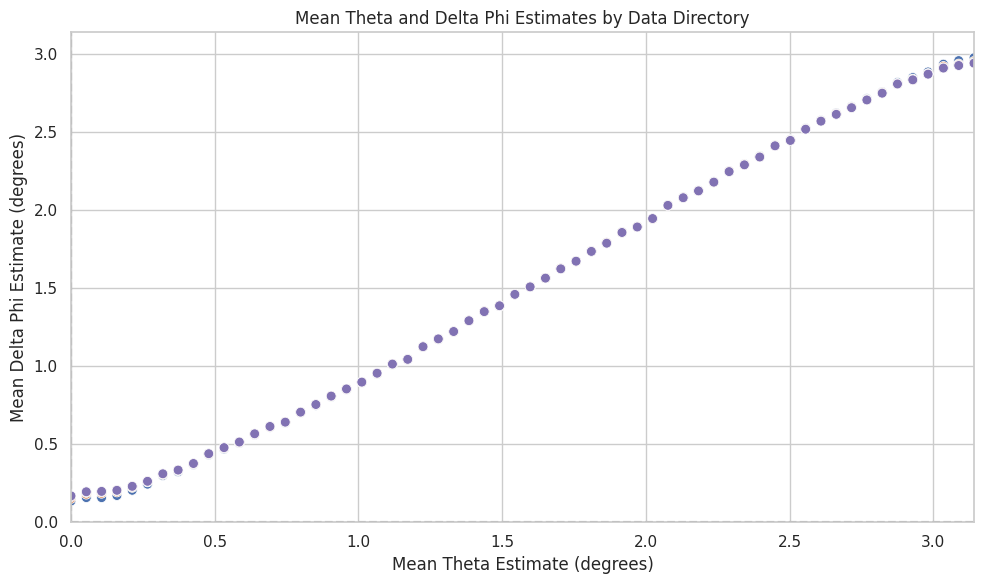

In [41]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

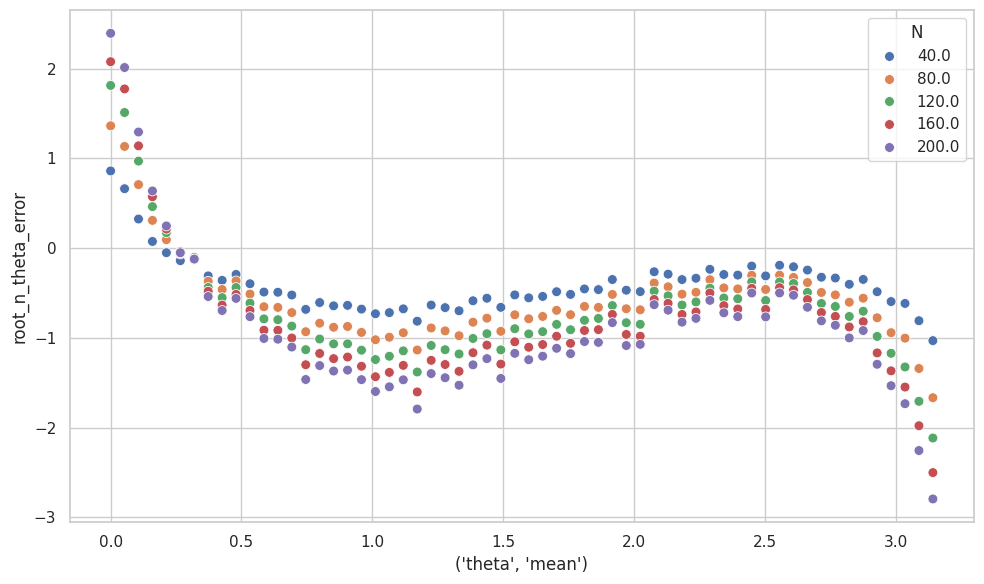

In [44]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

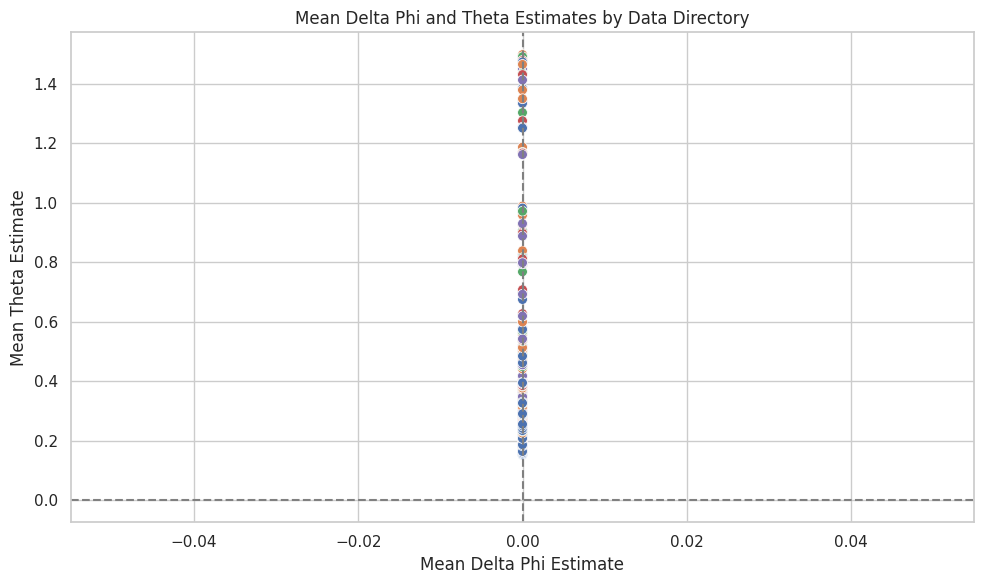

In [45]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

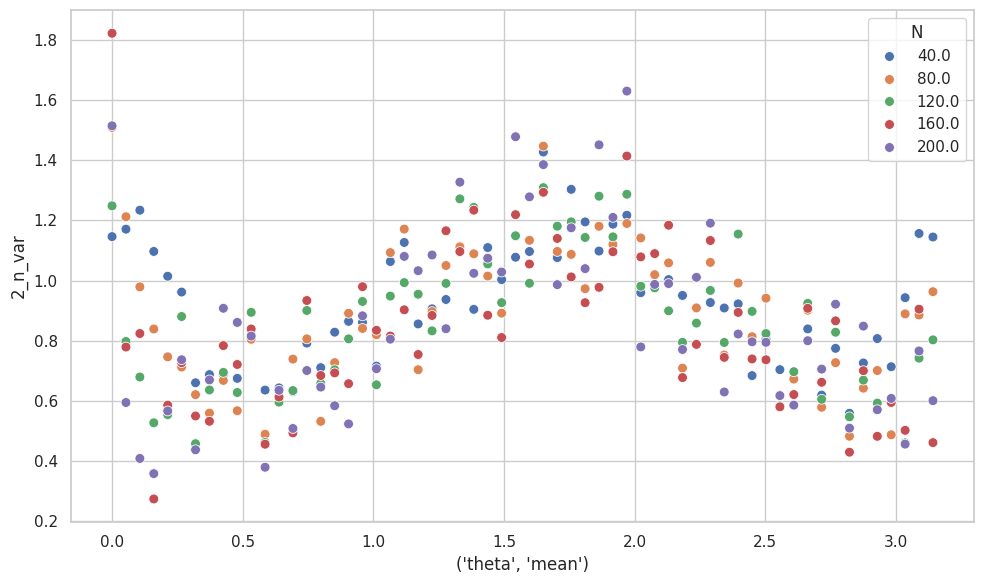

In [48]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()